# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Abid Juliant Indraswara
- **Email:** abidjuliant@gmail.com
- **ID Dicoding:** abidindraswara

## Menentukan Pertanyaan Bisnis

- Wilayah stasiun mana saja yang memiliki curah hujan tertinggi dan terrendah bila diurutkan berdasarkan top three?
- Wilayah stasiun mana saja yang memiliki kualitas udara terbaik dan terburuk bila diurutkan berdasarkan top three?
- Apakah dalam kurun waktu tertentu (bulan) memiliki keterkaitan untuk dapat memperkirakan cuaca?
- Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa parameter cuaca lain ('TEMP', 'PRES', 'DEWP', 'WSPM') ?
- Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa material polusi (PM2.5,PM10,SO2,NO2,CO,O3) ?
- Apa ada hubungan antara masing-masing material polusi (PM2.5,PM10,SO2,NO2,CO,O3) dengan masing-masing faktor penentu cuaca (Temperature, Pressure, Dew Point, Rainfall, Wind Direction, Wind Speed) ?

## Import Semua Packages/Library yang Digunakan

In [247]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from collections import Counter
from google.colab import files

## Data Wrangling

### Gathering Data

In [184]:
# Koneksi ke Google Drive untuk import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# Cek Folder
!ls '/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/'

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv	      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [186]:
# Dataset Aotizhongxin Station
aotizhongxin_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [187]:
# Dataset Changping Station
changping_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [188]:
# Dataset Dingling Station
dingling_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [189]:
# Dataset Dongsi Station
dongsi_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [190]:
# Dataset Guanyuan Station
guanyuan_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [191]:
# Dataset Gucheng Station
gucheng_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [192]:
# Dataset Huairou Station
huairou_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [193]:
# Dataset Nongzhanguan Station
nongzhanguan_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [194]:
# Dataset Shunyi Station
shunyi_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [195]:
# Dataset Tiantan Station
tiantan_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [196]:
# Dataset Wanliu Station
wanliu_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [197]:
# Dataset Wanshouxigong Station
wanshouxigong_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_Air_Quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Dataset tersebut diambil dari https://github.com/marceloreis/HTI/tree/master yang terdapat total 12 dataset.
- Jika dilihat semua dataset diatas memiliki nilai kolom yang sama, sehingga alangkah baiknya dataset perlu dijadikan satu saja.

### Assessing Data

In [198]:
# Cek Info Kolom Dataset
print('Informasi Dataset Aotizhongxin')
print(aotizhongxin_df.info())
print('\nInformasi Dataset Changping')
print(changping_df.info())
print('Informasi Dataset Dingling')
print(dingling_df.info())
print('\nInformasi Dataset Dongsi')
print(dongsi_df.info())
print('Informasi Dataset Guanyuan')
print(guanyuan_df.info())
print('\nInformasi Dataset Gucheng')
print(gucheng_df.info())
print('Informasi Dataset Huairou')
print(huairou_df.info())
print('\nInformasi Dataset Nongzhanguan')
print(nongzhanguan_df.info())
print('Informasi Dataset Shunyi')
print(shunyi_df.info())
print('\nInformasi Dataset Tiantan')
print(tiantan_df.info())
print('Informasi Dataset Wanliu')
print(wanliu_df.info())
print('\nInformasi Dataset Wanshouxigong')
print(wanshouxigong_df.info())

Informasi Dataset Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Informasi Dataset Changping
<cl

In [248]:
# Menggabungkan 12 dataset agar lebih udah dipantau dan dikelola
airquality_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], axis=0, ignore_index=True)
airquality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [200]:
# Cek Sampel Kategori pada Station lain
filtered_df = airquality_df[airquality_df['station'] == 'Wanshouxigong']
filtered_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
385704,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
385705,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
385706,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
385707,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
385708,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Perlunya menggabungkan semua dataset agar memudahkan dalam mengelola karena kolomnya sama sehingga 12 dataset sama saja.

In [201]:
# Cek Null Dataset Air Quality
print('Cek Null Dataset Air Quality')
print(airquality_df.isnull().sum())

Cek Null Dataset Air Quality
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [202]:
# Cek NaN Dataset Air Quality
print('Cek Null Dataset Air Quality')
print(airquality_df.isna().sum())

Cek Null Dataset Air Quality
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Ternyata terdapat banyak temuan data null antara NaN atau nol atau null.

In [203]:
# Cek Duplikat Data pada Dataset Air Quality
print('Cek Duplikat Data pada Dataset Air Quality : ', airquality_df.duplicated().sum())

Cek Duplikat Data pada Dataset Air Quality :  0


Duplikat data tidak ada sehingga dataset sejauh ini cukup aman tinggal memperbaiki bagian data null.

In [204]:
# Describe Dataset Air Quality
print('Describe Dataset Air Quality')
print(airquality_df.describe(include='all'))
# opsional membuat baris menjadi kolom dan sebaliknya
print(airquality_df.describe(include='all').T)

Describe Dataset Air Quality
                   No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.000000      16.000000   
75%      26298.250000    2016.000000      10.000000      23.000000   
max      35064.000000    2017.000000      12.000000      31.000000   

                 hour          PM2.5           PM10            SO2  \
count   420768.000000  412029.000000  414319.000000  411747.

**Insight:**
- Info mengenai 12 dataset tersebut memiliki kolom yang sama sehingga bisa digabungkan jadi satu.
- Data null dan NaN cukup banyak sehingga masih perlu diolah.
- Data duplikat 0 atau tidak ada.
- Cukup banya inforasi untuk describe masing-masing kolom.

### Cleaning Data

Kita telah mendapatkan beberapa informasi dari tahapan assessing data yang perlu di highlight ada pada bagian data null yang masih cukup banyak. Sehingga perlu diolah agar data dapat menghasilkan insight yang baik. Sebelum itu kita cek terlebih dahulu untuk masing-masing station memiliki berapa data. Kemudian kita lihat untuk masing-masing parameter cuacanya.

In [205]:
airquality_df.station.value_counts()

,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064
Dongsi,35064
Guanyuan,35064
Gucheng,35064
Huairou,35064
Nongzhanguan,35064
Shunyi,35064


In [206]:
# Summary NULL agar mudah dibaca
# Membuat summary table untuk menampilkan kolom apa saja yang memiliki nilai null beserta jumlahnya
null_summary = airquality_df.isna().sum().sort_values(ascending=False).reset_index()

# Menyesuaikan nama kolom index (default) menjadi Parameter dan NullSum
null_summary = null_summary.rename(columns={'index':'Parameter',0:'NullSum'})

# Membuat kolom baru berupa percentages yang menampilkan persentase null value pada masing-masing variabel terhadap jumlah record keseluruhan
null_summary['Percentages'] = (null_summary['NullSum']/35064)*100

# Menyaring kolom atau Parameter yang bernilai null
null_summary = null_summary[null_summary['NullSum'] > 0]

# Menampilkan tabel null_summary
null_summary

,Parameter,NullSum,Percentages
0,CO,20701,59.037760
1,O3,13277,37.865047
2,NO2,12116,34.553958
3,SO2,9021,25.727242
4,PM2.5,8739,24.922998
5,PM10,6449,18.392083
6,wd,1822,5.196213
7,DEWP,403,1.149327
8,TEMP,398,1.135067
9,PRES,393,1.120808


Dataset Kualitas Air ini berkaitan erat dengan waktu sehingga data ini dianggap time-series maka metode yang tepat dalam menangani null valuesnya adalah interpolation.

In [207]:
airquality_df = airquality_df.interpolate(method='linear',limit_direction='forward')
airquality_df.info()

<ipython-input-207-1e8c3619914d>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airquality_df = airquality_df.interpolate(method='linear',limit_direction='forward')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Jika dicek pada kolom wd masih ada temuan data yang null, kita coba cek dan sesuaikan.

In [208]:
null_summary = airquality_df.isna().sum().sort_values(ascending=False).reset_index()
null_summary = null_summary.rename(columns={'index':'Parameter',0:'NullSum'})
null_summary['Percentages'] = (null_summary['NullSum']/35064)*100
null_summary = null_summary[null_summary['NullSum'] > 0]
null_summary

,Parameter,NullSum,Percentages
0,wd,1822,5.196213


In [209]:
airquality_df.wd.value_counts()

,count
wd,
NE,43335
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


Baik sekarang kita paham kenapa tidak bisa diisi dengan menggunakan interpolate. Ternyata data nya adalah wind direction yang berupa data dengan nilai string kategori arah mata angin. Sehingga datanya masih cukup valid namun kita akan isi datanya dengan "N/A" karena data null perbandingannya kecil dibandingkan dengan total datanya agar bisa mendapatkan insight datanya.

In [210]:
airquality_df['wd'] = airquality_df['wd'].fillna('N/A')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [246]:
airquality_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,cluster
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,1
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,1
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,1
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00,0
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00,0
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00,0
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00,0


Convert Dataset Clean to CSV File

In [245]:
# Convert dataset to csv file
airquality_df.to_csv("airquality_data.csv", index=False)

In [250]:
files.download('airquality_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**
- Data null sudah dibersihkan termasuk untuk data bersifat object atau kategori seperti wd diisi dengan nilai "N/A"
- Untuk data null lain diisi dengan menggunakan interpolate() karena dataset yang dimiliki adalah data time-series bersifat berkelanjutan.

## Exploratory Data Analysis (EDA)

### Explore Air Quality Dataset

Dataset : airquality_df

In [212]:
airquality_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Jika merujuk dari data diatas kita bisa membagi beberapa bagian untuk dapat menganalisis dataset kualitas air yaitu
1. Waktu : terdiri dari kolom year, month, day, hour.
2. Tempat : terdiri dari kolom station.
3. Parameter Cuaca : terdiri dari kolom TEMP (temperature), PRES (pressure - tekanan udara), DEWP (dew point - titik embun), RAIN (curah hujan), wd (wind direction - arah mata angin) dan WSPM (wind speed - kecepatan angin).
4. Parameter Kualitas Udara : terdiri dari PM2.5 (partikel udara 2.5mikrometer), PM10 (partikel udara 10mikrometer), SO2 (sulfur dioxide), NO2 (nitrogen dioxide), CO (Carbon Monoxide) dan O3 (Ozone).

Dari pembagian diatas kita dapat menganalisis hubungan atar bagian. Sebelum itu kita perlu menambahkan kolom tanggal gabungan tahun, bulan, hari dan jam. Jam memiliki data satu dihitung perjam.

In [213]:
airquality_df['datetime'] = pd.to_datetime(airquality_df[['year', 'month', 'day', 'hour']])
airquality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


Mengetahui curah hujan tertinggi, terendah dan rata-rata berdasarkan station.

In [214]:
rain_summary = airquality_df.groupby('station')['RAIN'].agg(['max', 'min', 'mean']).reset_index()
rain_summary.columns = ['station', 'max_rain', 'min_rain', 'mean_rain']
rain_summary = rain_summary.sort_values(by='max_rain', ascending=False).reset_index(drop=True)
rain_summary

,station,max_rain,min_rain,mean_rain
0,Aotizhongxin,72.5,0.0,0.067383
1,Guanyuan,72.5,0.0,0.067383
2,Wanliu,72.5,0.0,0.068224
3,Changping,52.1,0.0,0.060293
4,Dingling,52.1,0.0,0.060293
5,Dongsi,46.4,0.0,0.063983
6,Nongzhanguan,46.4,0.0,0.063983
7,Tiantan,46.4,0.0,0.063983
8,Wanshouxigong,46.4,0.0,0.064285
9,Huairou,45.9,0.0,0.067950


Melihat persebaran data TEMP, PRES, DEWP, RAIN

<Axes: >

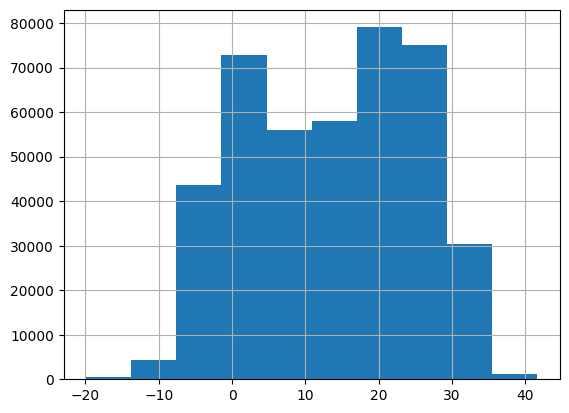

In [215]:
airquality_df.TEMP.hist()

<Axes: >

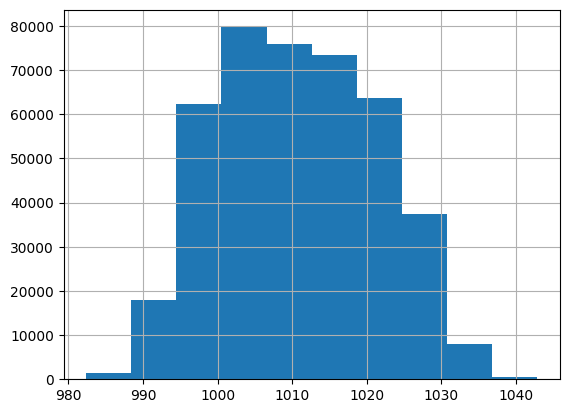

In [216]:
airquality_df.PRES.hist()

<Axes: >

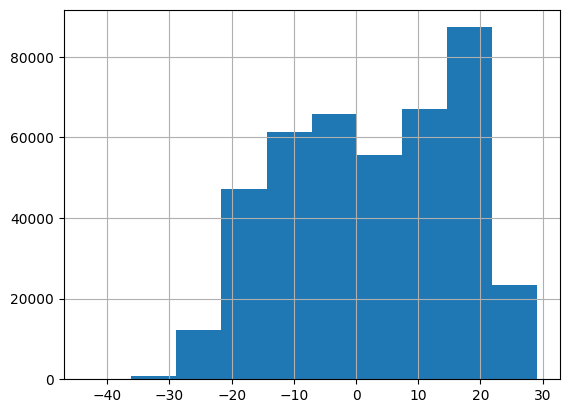

In [217]:
airquality_df.DEWP.hist()

<Axes: >

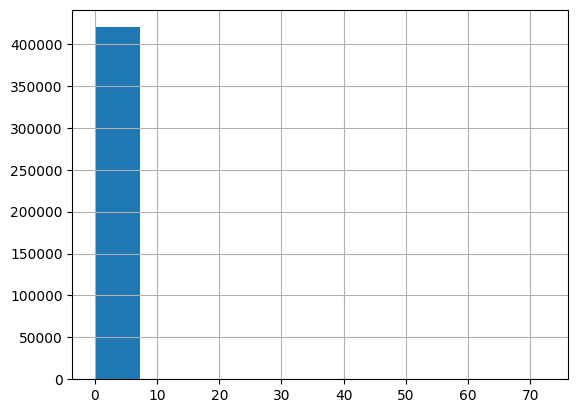

In [218]:
airquality_df.RAIN.hist()

In [219]:
rain_counts = airquality_df['RAIN'].value_counts()
rain_counts

,count
RAIN,
0.0,404241
0.1,3724
0.2,1841
0.3,1382
0.4,909
...,...
17.3,1
36.1,1
18.2,1


In [220]:
# Menampilkan hubungan parameter curah hujan terhadap agregasi parameter co

# rain2co_param_summary= airquality_df.groupby('RAIN').agg({
#     "CO": ['max', 'min', 'mean', pd.Series.mode, 'sum'],
# }).reset_index()
rain2co_param_summary= airquality_df.groupby('RAIN')['CO'].agg(['max', 'min', 'mean', pd.Series.mode, 'sum', 'count']).reset_index()
rain2co_param_summary.columns = ['Rain_Param', 'max_co', 'min_co', 'mean_co', 'mode_co', 'sum_co', 'count_co']
rain2co_param_summary = rain2co_param_summary.sort_values(by='max_co', ascending=True).reset_index(drop=True)
rain2co_param_summary

,Rain_Param,max_co,min_co,mean_co,mode_co,sum_co,count_co
0,20.4,400.0,400.0,400.000000,400.0,4.000000e+02,1
1,33.5,400.0,400.0,400.000000,400.0,4.000000e+02,1
2,29.2,400.0,400.0,400.000000,400.0,4.000000e+02,1
3,15.6,400.0,400.0,400.000000,400.0,4.000000e+02,1
4,18.2,400.0,400.0,400.000000,400.0,4.000000e+02,1
...,...,...,...,...,...,...,...
251,1.6,10000.0,100.0,1192.209660,700.0,2.479796e+05,208
252,1.9,10000.0,300.0,1425.166650,800.0,2.094995e+05,147
253,0.2,10000.0,100.0,1169.176085,500.0,2.152453e+06,1841
254,0.1,10000.0,100.0,1166.703059,800.0,4.344802e+06,3724


In [221]:
airquality_df.sort_values(by="CO", ascending=False)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
300342,19831,2015,6,5,6,80.0,80.0,2.0,41.0,10000.0,2.0,15.900,995.60,15.4,0.0,NE,2.0,Shunyi,2015-06-05 06:00:00
209059,33740,2017,1,4,19,571.0,679.0,15.0,270.0,10000.0,3.0,1.000,1018.70,-4.6,0.0,S,0.8,Gucheng,2017-01-04 19:00:00
125018,19827,2015,6,5,2,51.0,51.0,3.0,50.0,10000.0,32.0,18.000,994.80,14.3,0.0,SSW,0.4,Dongsi,2015-06-05 02:00:00
125017,19826,2015,6,5,1,50.0,50.0,3.0,52.0,10000.0,36.0,18.900,995.10,13.7,0.0,SW,1.2,Dongsi,2015-06-05 01:00:00
125015,19824,2015,6,4,23,48.0,48.0,7.0,34.0,10000.0,68.0,19.400,996.50,13.6,0.0,W,1.5,Dongsi,2015-06-04 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101520,31393,2016,9,29,0,12.0,12.0,2.0,2.0,100.0,31.0,10.825,1014.00,4.4,0.0,NE,1.0,Dingling,2016-09-29 00:00:00
101519,31392,2016,9,28,23,14.0,14.0,2.0,2.0,100.0,34.0,11.075,1014.25,4.7,0.0,SE,1.1,Dingling,2016-09-28 23:00:00
101518,31391,2016,9,28,22,15.0,15.0,2.0,2.0,100.0,34.0,11.725,1014.00,5.0,0.0,NE,1.4,Dingling,2016-09-28 22:00:00
101517,31390,2016,9,28,21,15.0,15.0,2.0,3.0,100.0,37.0,12.725,1014.00,5.3,0.0,NW,1.6,Dingling,2016-09-28 21:00:00


Berdasarkan parameter hujan yaitu curah hujan dibandingkan dengan kdar Co diudara maka terlihat semakin besar kadar CO di udara maka semakin kecil curah hujannya. Bisa dilihat dari rata-ratanya dimana jumlah curah hujan dibagi dengan jumlah data yang ada dan menampilkan jumlah CO yang banyak. Ada beberapa parameter kadar udara yang bisa dibandingkan dengan curah hujan.
- PM2.5      : Partikel udara 2.5 mikrometer (sangat berbahaya)
- PM10       : Partikel udara 10 mikrometer (cukup berbahaya)
- SO2        : Sulfur Dioxide
- NO2        : Natrium Dioxide
- CO         : Karbon Monoxide
- O3         : Ozon

Masing-masing kita perlu melihat bagaimana korelasi nya, sebelum itu dilihat secara max, min, mean, mode dan sum.
1. Max digunakan untuk melihat nilai maksimal yang dihasilkan suatu parameter kadar udara terhadap curah hujan.
2. Min digunakan untuk melihat nilai minimum yang dihasilkan suatu parameter kadar udara terhadap curah hujan.
3. Mean digunakan untuk melihat nilai rata-rata yang dihasilkan suatu parameter kadar udara terhadap curah hujan.
4. Mode digunakan untuk melihat nilai paling banyak yang dihasilkan suatu parameter kadar udara terhadap curah hujan.
5. Sum digunakan untuk melihat jumlah yang dihasilkan suatu parameter kadar udara terhadap curah hujan.
6. Count digunakan untuk melihat total data yang terdeteksi suatu parameter kadar udara terhadap curah hujan.

Agar lebih memudahkan tabel pembacaan akan dipisah berdasarkan PM2.5, PM10, SO2, NO2, CO dan O3 untuk asing-masing max, min, mean, mode dan sum.

In [222]:
# Tabel Summary Max

rain2max_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['max']).reset_index()
rain2max_param_summary.columns = ['Rain_Param', 'max_co', 'max_pm2.5', 'max_pm10', 'max_so2', 'max_no3', 'max_o3']
rain2max_param_summary = rain2max_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2max_param_summary

,Rain_Param,max_co,max_pm2.5,max_pm10,max_so2,max_no3,max_o3
0,72.50,1400.0,259.0,175.0,39.6984,47.8349,194.000000
1,52.10,500.0,51.0,51.0,2.0000,16.0000,155.000000
2,47.70,600.0,27.0,27.0,2.0000,9.0000,141.000000
3,46.40,1200.0,108.0,108.0,5.0000,59.0000,96.000000
4,45.90,2700.0,266.0,391.0,7.0000,21.0000,175.000000
...,...,...,...,...,...,...,...
251,0.30,5900.0,464.0,474.0,157.0000,175.0000,1071.000000
252,0.20,10000.0,362.0,450.0,110.0000,148.0000,466.521739
253,0.15,1300.0,109.0,109.0,2.0000,42.0000,3.000000
254,0.10,10000.0,506.0,551.0,164.0000,163.0000,1071.000000


In [223]:
# Tabel Summary Min

rain2min_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['min']).reset_index()
rain2min_param_summary.columns = ['Rain_Param', 'min_co', 'min_pm2.5', 'min_pm10', 'min_so2', 'min_no3', 'min_o3']
rain2min_param_summary = rain2min_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2min_param_summary

,Rain_Param,min_co,min_pm2.5,min_pm10,min_so2,min_no3,min_o3
0,72.50,1100.0,209.0,146.0,3.0000,24.0000,101.0000
1,52.10,300.0,27.0,30.0,2.0000,8.0000,120.0000
2,47.70,600.0,27.0,27.0,2.0000,9.0000,141.0000
3,46.40,600.0,56.0,56.0,2.0000,15.0000,32.0000
4,45.90,900.0,82.0,102.0,4.0000,16.0000,51.0000
...,...,...,...,...,...,...,...
251,0.30,100.0,3.0,2.0,0.2856,2.0000,1.0000
252,0.20,100.0,3.0,2.0,0.2856,2.0000,1.0000
253,0.15,1300.0,109.0,109.0,2.0000,42.0000,3.0000
254,0.10,100.0,3.0,2.0,0.2856,2.0000,0.2142


In [224]:
# Tabel Summary Mean

rain2mean_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['mean']).reset_index()
rain2mean_param_summary.columns = ['Rain_Param', 'mean_co', 'mean_pm2.5', 'mean_pm10', 'mean_so2', 'mean_no3', 'mean_o3']
rain2mean_param_summary = rain2mean_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2mean_param_summary

,Rain_Param,mean_co,mean_pm2.5,mean_pm10,mean_so2,mean_no3,mean_o3
0,72.50,1266.666667,226.333333,159.333333,15.375200,36.331400,151.240733
1,52.10,400.000000,39.000000,40.500000,2.000000,12.000000,137.500000
2,47.70,600.000000,27.000000,27.000000,2.000000,9.000000,141.000000
3,46.40,916.666667,77.000000,77.000000,3.000000,34.000000,63.833333
4,45.90,1800.000000,174.000000,246.500000,5.500000,18.500000,113.000000
...,...,...,...,...,...,...,...
251,0.30,1163.923415,65.519273,70.943271,6.188705,39.351088,46.250284
252,0.20,1169.176085,66.218414,74.017639,5.984348,41.779478,44.636549
253,0.15,1300.000000,109.000000,109.000000,2.000000,42.000000,3.000000
254,0.10,1166.703059,66.259668,72.215674,6.150807,40.568462,45.581560


In [225]:
# Tabel Summary Mode

rain2mode_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg([pd.Series.mode]).reset_index()
rain2mode_param_summary.columns = ['Rain_Param', 'mode_co', 'mode_pm2.5', 'mode_pm10', 'mode_so2', 'mode_no3', 'mode_o3']
rain2mode_param_summary = rain2mode_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2mode_param_summary

,Rain_Param,mode_co,mode_pm2.5,mode_pm10,mode_so2,mode_no3,mode_o3
0,72.50,"[1100.0, 1300.0, 1400.0]","[209.0, 211.0, 259.0]","[146.0, 157.0, 175.0]","[3.0, 3.4272, 39.6984]","[24.0, 37.1593, 47.8349]","[101.0, 158.7222, 194.0]"
1,52.10,"[300.0, 500.0]","[27.0, 51.0]","[30.0, 51.0]",2.0,"[8.0, 16.0]","[120.0, 155.0]"
2,47.70,600.0,27.0,27.0,2.0,9.0,141.0
3,46.40,"[600.0, 700.0, 900.0, 1000.0, 1100.0, 1200.0]","[56.0, 68.0, 75.0, 77.0, 78.0, 108.0]","[56.0, 68.0, 75.0, 77.0, 78.0, 108.0]",2.0,"[15.0, 21.0, 30.0, 31.0, 48.0, 59.0]","[32.0, 45.0, 68.0, 70.0, 72.0, 96.0]"
4,45.90,"[900.0, 2700.0]","[82.0, 266.0]","[102.0, 391.0]","[4.0, 7.0]","[16.0, 21.0]","[51.0, 175.0]"
...,...,...,...,...,...,...,...
251,0.30,600.0,"[3.0, 43.0]",68.0,2.0,34.0,2.0
252,0.20,500.0,3.0,56.0,2.0,45.0,2.0
253,0.15,1300.0,109.0,109.0,2.0,42.0,3.0
254,0.10,800.0,3.0,23.0,2.0,34.0,2.0


In [226]:
# Tabel Summary Sum

rain2sum_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['sum']).reset_index()
rain2sum_param_summary.columns = ['Rain_Param', 'sum_co', 'sum_pm2.5', 'sum_pm10', 'sum_so2', 'sum_no3', 'sum_o3']
rain2sum_param_summary = rain2sum_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2sum_param_summary

,Rain_Param,sum_co,sum_pm2.5,sum_pm10,sum_so2,sum_no3,sum_o3
0,72.50,3.800000e+03,6.790000e+02,4.780000e+02,4.612560e+01,1.089942e+02,4.537222e+02
1,52.10,8.000000e+02,7.800000e+01,8.100000e+01,4.000000e+00,2.400000e+01,2.750000e+02
2,47.70,6.000000e+02,2.700000e+01,2.700000e+01,2.000000e+00,9.000000e+00,1.410000e+02
3,46.40,5.500000e+03,4.620000e+02,4.620000e+02,1.800000e+01,2.040000e+02,3.830000e+02
4,45.90,3.600000e+03,3.480000e+02,4.930000e+02,1.100000e+01,3.700000e+01,2.260000e+02
...,...,...,...,...,...,...,...
251,0.30,1.608542e+06,9.054764e+04,9.804360e+04,8.552791e+03,5.438320e+04,6.391789e+04
252,0.20,2.152453e+06,1.219081e+05,1.362665e+05,1.101718e+04,7.691602e+04,8.217589e+04
253,0.15,1.300000e+03,1.090000e+02,1.090000e+02,2.000000e+00,4.200000e+01,3.000000e+00
254,0.10,4.344802e+06,2.467510e+05,2.689312e+05,2.290561e+04,1.510770e+05,1.697457e+05


In [227]:
# Tabel Summary Count

rain2count_param_summary= airquality_df.groupby('RAIN')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['count']).reset_index()
rain2count_param_summary.columns = ['Rain_Param', 'count_co', 'count_pm2.5', 'count_pm10', 'count_so2', 'count_no3', 'count_o3']
rain2count_param_summary = rain2count_param_summary.sort_values(by='Rain_Param', ascending=False).reset_index(drop=True)
rain2count_param_summary

,Rain_Param,count_co,count_pm2.5,count_pm10,count_so2,count_no3,count_o3
0,72.50,3,3,3,3,3,3
1,52.10,2,2,2,2,2,2
2,47.70,1,1,1,1,1,1
3,46.40,6,6,6,6,6,6
4,45.90,2,2,2,2,2,2
...,...,...,...,...,...,...,...
251,0.30,1382,1382,1382,1382,1382,1382
252,0.20,1841,1841,1841,1841,1841,1841
253,0.15,1,1,1,1,1,1
254,0.10,3724,3724,3724,3724,3724,3724


Hasilnya cukup mengesankan dari beberapa nilai yang di assign untuk max, min, mean dan mode masih terlalu ambil karena nilai curah hujan dari yang terkecil hingga terbesar ketika dihubungkan belum mendapatkan hubungan yang sesuai karena terlalu acak. Jika dibandingkan dengan sum dan count disitu sangat terlihat bahwa jumlah parameter kadar udara dan jumlah data yang terdeteksi berbanding terbalik dengan nilai curah hujan, semakin besar jumlah parameter kadar udara dan datanya maka semakin kecil pula curah hujannya.

In [228]:
# Korelasi Parameter Curah Hujan dengan Paramater Kadar Udara
rain_correlation = airquality_df[[ 'RAIN','CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].corr()
rain_correlation

,RAIN,CO,PM2.5,PM10,SO2,NO2,O3
RAIN,1.000000,-0.013281,-0.014452,-0.026505,-0.040028,-0.043665,0.023361
CO,-0.013281,1.000000,0.780165,0.691887,0.522678,0.694036,-0.306979
PM2.5,-0.014452,0.780165,1.000000,0.878874,0.478223,0.664306,-0.149508
PM10,-0.026505,0.691887,0.878874,1.000000,0.460572,0.645583,-0.110443
SO2,-0.040028,0.522678,0.478223,0.460572,1.000000,0.495826,-0.165311
NO2,-0.043665,0.694036,0.664306,0.645583,0.495826,1.000000,-0.465912
O3,0.023361,-0.306979,-0.149508,-0.110443,-0.165311,-0.465912,1.000000


Jika dilihat melalui tabel korelasi diatas bisa dipastikan nilai 1 berkorelasi sempurna, nilai negatif 1 memiliki korelasi berkebalikan artinya jika curah hujan meningkat maka parameter kadar udara menurun dan untuk desimal mendekati nilai satu memiliki korelasi berbanding lurus namun tidak sempurna.

**Insight:**
- Mengubah datetime agar kedepannya bisa diolah dalam pembuatan filter maupun visual dengan mudah.
- Curah hujan di masing-masing station cukup unik sehingga bisa mengetahui nilai tertinggi dan rata-rata.
- Histogram memberikan gambaran distribusi data pada parameter cuaca, namun  bisa dilihat untuk curah hujan terlalu banyak yang bernilai 0 sehingga kemungkinan adanya pencilan atau outlier.
- Hubungan curah hujan dengan parameter kadar udara bisa dilihat melalui nilai sum dan count secara tepat karena yang memiliki pengeruh yang dapat disimpulkan.
- Korelasi yang dihasilkan antara curah hujan dengan parameter kadar udara sangat jelas untuk diambil kesimpulan, terlihat hanya parameter O3 atau Ozon yang berkorelasi berbanding lurus dengan nilai curah hujan. Sebaliknya paramater kadar udara lain berbanding terbalik.

## Visualization & Explanatory Analysis

### Wilayah stasiun mana saja yang memiliki curah hujan tertinggi dan terrendah bila diurutkan berdasarkan top three?

In [229]:
# Tabel Station Summary berdasarkan Curah Hujan

station2rain_summary= airquality_df.groupby('station').agg(
    mean=('RAIN', 'mean'),          # Rata-rata nilai RAIN per station
    count=('RAIN', lambda x: (x != 0).sum()),  # Hitung jumlah nilai RAIN yang tidak 0 per station
    max=('RAIN', 'max'),          # Nilai maksimum RAIN per station
    sum=('RAIN', 'sum')
).reset_index()
station2rain_summary.columns = ['Station', 'mean_rain', 'count_non_zero_rain', 'max_rain', 'sum_rain']
station2rain_summary = station2rain_summary.sort_values(by='mean_rain', ascending=False).reset_index(drop=True)
station2rain_summary

,Station,mean_rain,count_non_zero_rain,max_rain,sum_rain
0,Wanliu,0.068224,1436,72.5,2392.20
1,Huairou,0.067950,1493,45.9,2382.60
2,Aotizhongxin,0.067383,1380,72.5,2362.70
3,Guanyuan,0.067383,1380,72.5,2362.70
4,Gucheng,0.064374,1348,41.9,2257.20
5,Wanshouxigong,0.064285,1361,46.4,2254.10
6,Dongsi,0.063983,1371,46.4,2243.50
7,Nongzhanguan,0.063983,1371,46.4,2243.50
8,Tiantan,0.063983,1371,46.4,2243.50
9,Shunyi,0.061010,1312,37.3,2139.25


<Figure size 1000x600 with 0 Axes>

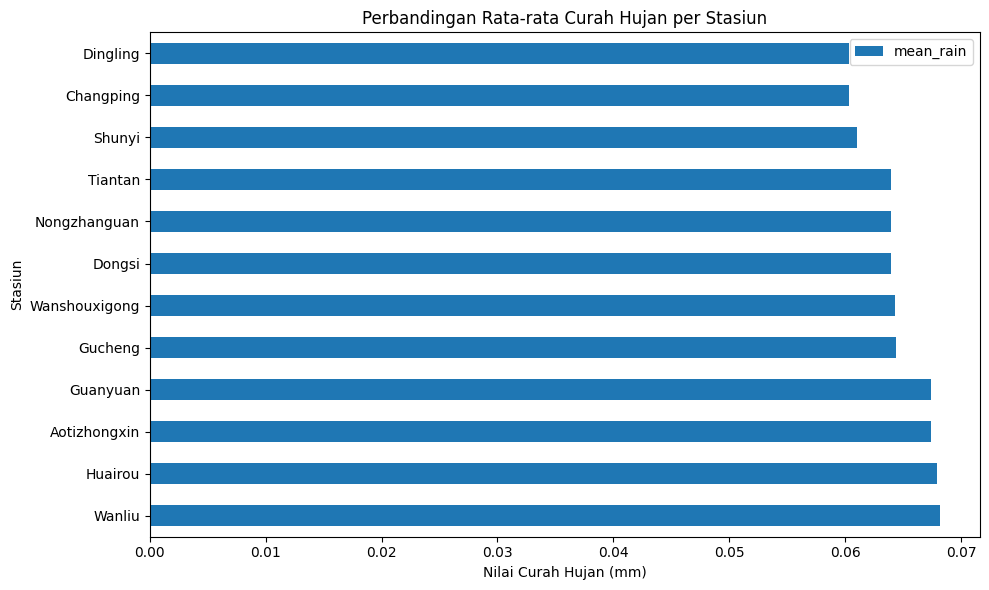

In [230]:
# Menggunakan DataFrame yang sudah ada (misalnya station2rain_summary)
plt.figure(figsize=(10, 6))

# Grafik batang horizontal untuk 'mean' per stasiun
station2rain_summary.set_index('Station')[['mean_rain']].plot(kind='barh', figsize=(10, 6))

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Rata-rata Curah Hujan per Stasiun')
plt.xlabel('Nilai Curah Hujan (mm)')
plt.ylabel('Stasiun')

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

Catatan : untuk data curah hujan tertinggi dan terendah berdasarkan stasiun untuk tabel sudah cukup menjelaskan sedangkan jika dibuat grafik akan menjadi bias bagi audiens. Data curah hujan rata-rata dan jumlah data selain 0 curah hujan terbanyak sudah cukup menjelaskan stasiun mana yang memiliki wilayah dengan curah hujan tertinggi. Walaupun nilai maksimal curah hujannya tidak memiliki nilai tertinggi dari semua wilayah namun data yang terdeteksi bisa memberi kesimpulan bawah wilayah dengan curah hujan tinggi ada di wilayah stasiun Wanliu sedangkan wilayah dengan curah hujan rendah ada di wilayah stasiun Dingling.

### Wilayah stasiun mana saja yang memiliki kualitas udara terbaik dan terburuk bila diurutkan berdasarkan top three?

In [231]:
station2mean_param_summary= airquality_df.groupby('station')[['CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].agg(['mean']).reset_index()
station2mean_param_summary.columns = ['Station', 'mean_co', 'mean_pm2.5', 'mean_pm10', 'mean_so2', 'mean_no3', 'mean_o3']
station2mean_param_summary = station2mean_param_summary.sort_values(by='mean_co', ascending=False).reset_index(drop=True)
station2mean_param_summary

,Station,mean_co,mean_pm2.5,mean_pm10,mean_so2,mean_no3,mean_o3
0,Wanshouxigong,1373.618569,85.067548,112.505795,17.363354,55.495402,55.919979
1,Gucheng,1338.100060,84.074802,119.261567,15.705821,55.836004,58.000001
2,Dongsi,1331.913045,86.144243,110.347617,18.506142,53.953078,57.700357
3,Wanliu,1328.761180,83.467612,110.707858,18.409514,65.668418,46.909375
4,Nongzhanguan,1327.767611,85.079472,109.384022,18.760102,58.095053,58.432876
5,Tiantan,1305.333262,82.033097,106.537076,14.510018,53.258828,56.148077
6,Aotizhongxin,1264.692405,82.540623,110.210033,17.459251,59.074106,55.328626
7,Guanyuan,1258.327045,82.897522,109.372349,17.609312,58.139298,54.817142
8,Shunyi,1197.904660,79.437962,99.271936,13.445971,44.094695,54.218810
9,Changping,1156.990246,70.986438,94.788575,14.943066,44.206153,57.976253


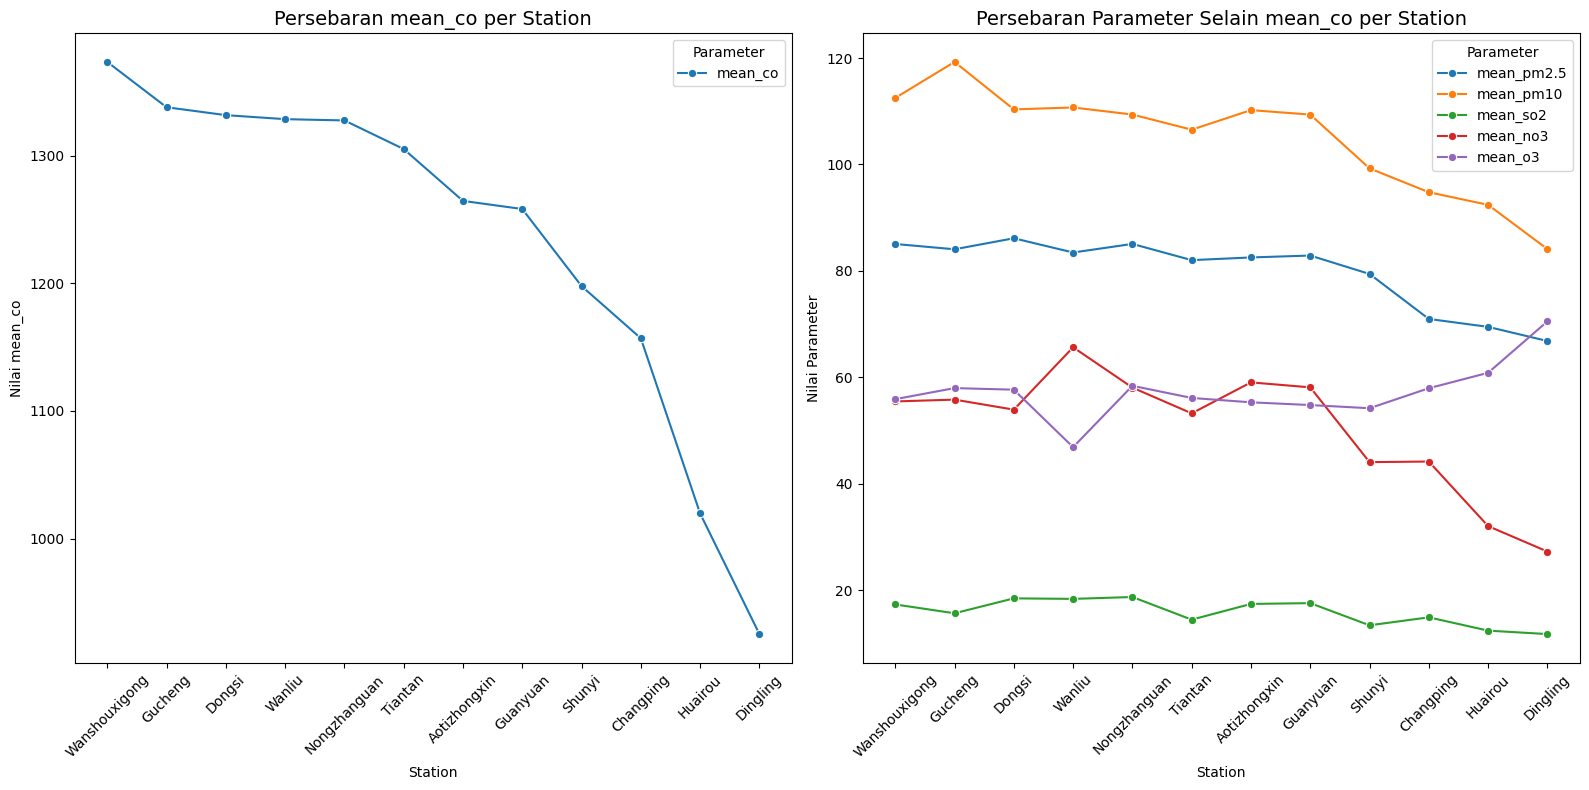

In [232]:
# Mengubah data ke format long (long format)
df_long = pd.melt(station2mean_param_summary, id_vars=['Station'], value_vars=['mean_co', 'mean_pm2.5', 'mean_pm10', 'mean_so2', 'mean_no3', 'mean_o3'],
                  var_name='Parameter', value_name='Value')

# Membagi data menjadi dua bagian
df_co = df_long[df_long['Parameter'] == 'mean_co']  # Data hanya untuk mean_co
df_other = df_long[df_long['Parameter'] != 'mean_co']  # Data selain mean_co

# Membuat figure dan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Line chart untuk mean_co
sns.lineplot(data=df_co, x='Station', y='Value', hue='Parameter', marker='o', ax=axes[0], color='blue')
axes[0].set_title('Persebaran mean_co per Station', fontsize=14)
axes[0].set_xlabel('Station')
axes[0].set_ylabel('Nilai mean_co')
axes[0].tick_params(axis='x', rotation=45)

# Line chart untuk selain mean_co
sns.lineplot(data=df_other, x='Station', y='Value', hue='Parameter', marker='o', ax=axes[1])
axes[1].set_title('Persebaran Parameter Selain mean_co per Station', fontsize=14)
axes[1].set_xlabel('Station')
axes[1].set_ylabel('Nilai Parameter')
axes[1].tick_params(axis='x', rotation=45)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

          Station  air_quality_score
0        Dingling           0.163493
1         Huairou           0.154134
2          Shunyi           0.138991
3       Changping           0.132292
4         Tiantan           0.127847
5         Gucheng           0.119848
6   Wanshouxigong           0.114867
7    Aotizhongxin           0.114257
8        Guanyuan           0.114232
9          Wanliu           0.112632
10         Dongsi           0.111323
11   Nongzhanguan           0.109280




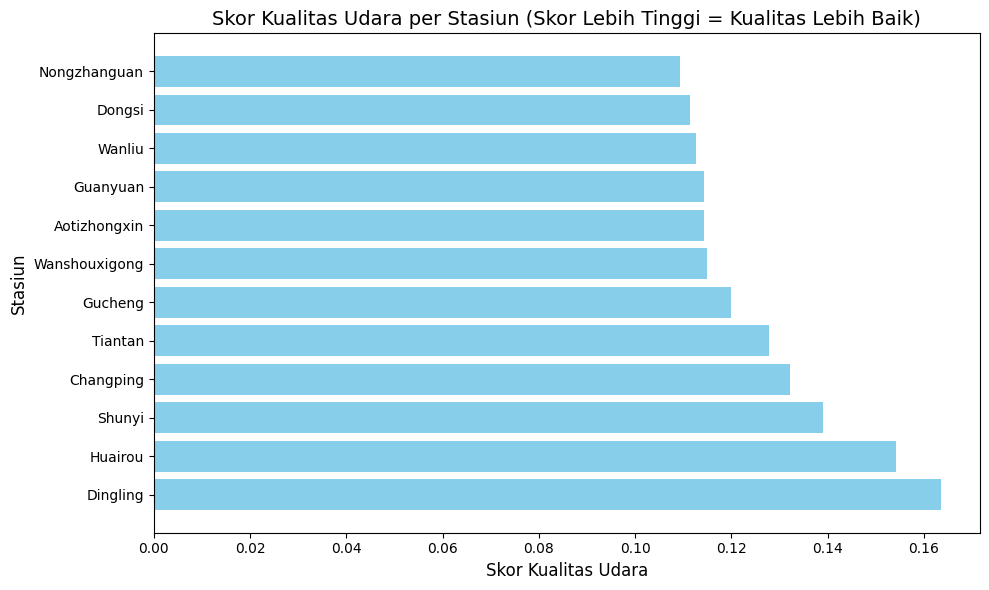

In [233]:
# Menghitung skor kualitas udara untuk setiap stasiun
# Skor rendah menunjukkan kualitas udara lebih baik, jadi kita akan menggunakan invers dari setiap parameter
station2mean_param_summary['air_quality_score'] = (1 / station2mean_param_summary['mean_co']) + (1 / station2mean_param_summary['mean_pm2.5']) + (1 / station2mean_param_summary['mean_pm10']) + \
                          (1 / station2mean_param_summary['mean_so2']) + (1 / station2mean_param_summary['mean_no3']) + (1 / station2mean_param_summary['mean_o3'])

# Menyortir berdasarkan air_quality_score (skor lebih tinggi = kualitas udara lebih baik)
df_sorted = station2mean_param_summary.sort_values(by='air_quality_score', ascending=False)

# Menampilkan Tabel Stasiun dengan Kualitas Udara Terbaik dan Terburuk
df_sorted = df_sorted[['Station', 'air_quality_score']].reset_index(drop=True)

# Menampilkan tabel
print(df_sorted)
print("\n")

# Plot untuk menampilkan kualitas udara setiap stasiun
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Station'], df_sorted['air_quality_score'], color='skyblue')

# Menambahkan judul dan label
plt.title('Skor Kualitas Udara per Stasiun (Skor Lebih Tinggi = Kualitas Lebih Baik)', fontsize=14)
plt.xlabel('Skor Kualitas Udara', fontsize=12)
plt.ylabel('Stasiun', fontsize=12)

# Menampilkan chart
plt.tight_layout()
plt.show()

### Apakah dalam kurun waktu tertentu memiliki keterkaitan untuk dapat memperkirakan cuaca?

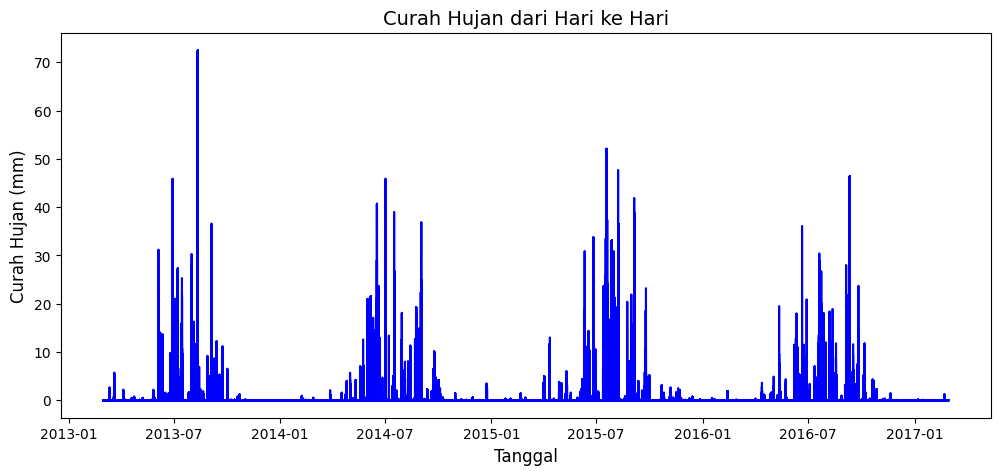

In [234]:
airquality_df['datetime'] = pd.to_datetime(airquality_df['datetime'])

plt.figure(figsize=(12, 5))
plt.title('Curah Hujan dari Hari ke Hari', fontsize=14)
plt.plot(airquality_df['datetime'], airquality_df['RAIN'], color='blue')
plt.xlabel('Tanggal',size=12)
plt.ylabel('Curah Hujan (mm)',size=12)
plt.show()

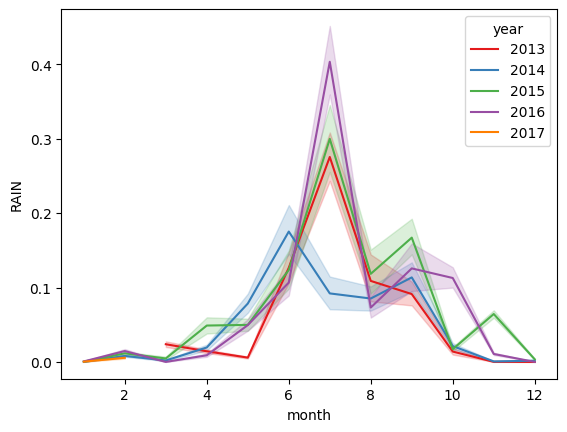

In [235]:
sns.lineplot(x=airquality_df['month'], y=airquality_df['RAIN'], hue=airquality_df['year'], palette='Set1')
plt.show()

### Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa parameter kadar kualitas udara (PM2.5,PM10,SO2,NO2,CO,O3) ?

In [236]:
# Korelasi Parameter Curah Hujan dengan Paramater Kadar Udara
rain_correlation = airquality_df[[ 'RAIN','CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].corr()
rain_correlation

,RAIN,CO,PM2.5,PM10,SO2,NO2,O3
RAIN,1.000000,-0.013281,-0.014452,-0.026505,-0.040028,-0.043665,0.023361
CO,-0.013281,1.000000,0.780165,0.691887,0.522678,0.694036,-0.306979
PM2.5,-0.014452,0.780165,1.000000,0.878874,0.478223,0.664306,-0.149508
PM10,-0.026505,0.691887,0.878874,1.000000,0.460572,0.645583,-0.110443
SO2,-0.040028,0.522678,0.478223,0.460572,1.000000,0.495826,-0.165311
NO2,-0.043665,0.694036,0.664306,0.645583,0.495826,1.000000,-0.465912
O3,0.023361,-0.306979,-0.149508,-0.110443,-0.165311,-0.465912,1.000000


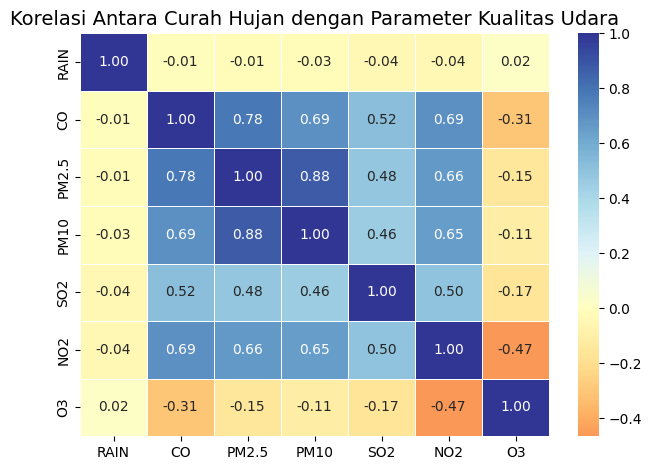

In [237]:
sns.heatmap(rain_correlation, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5, center=0)
plt.title('Korelasi Antara Curah Hujan dengan Parameter Kualitas Udara', fontsize=14)
plt.tight_layout()
plt.show()

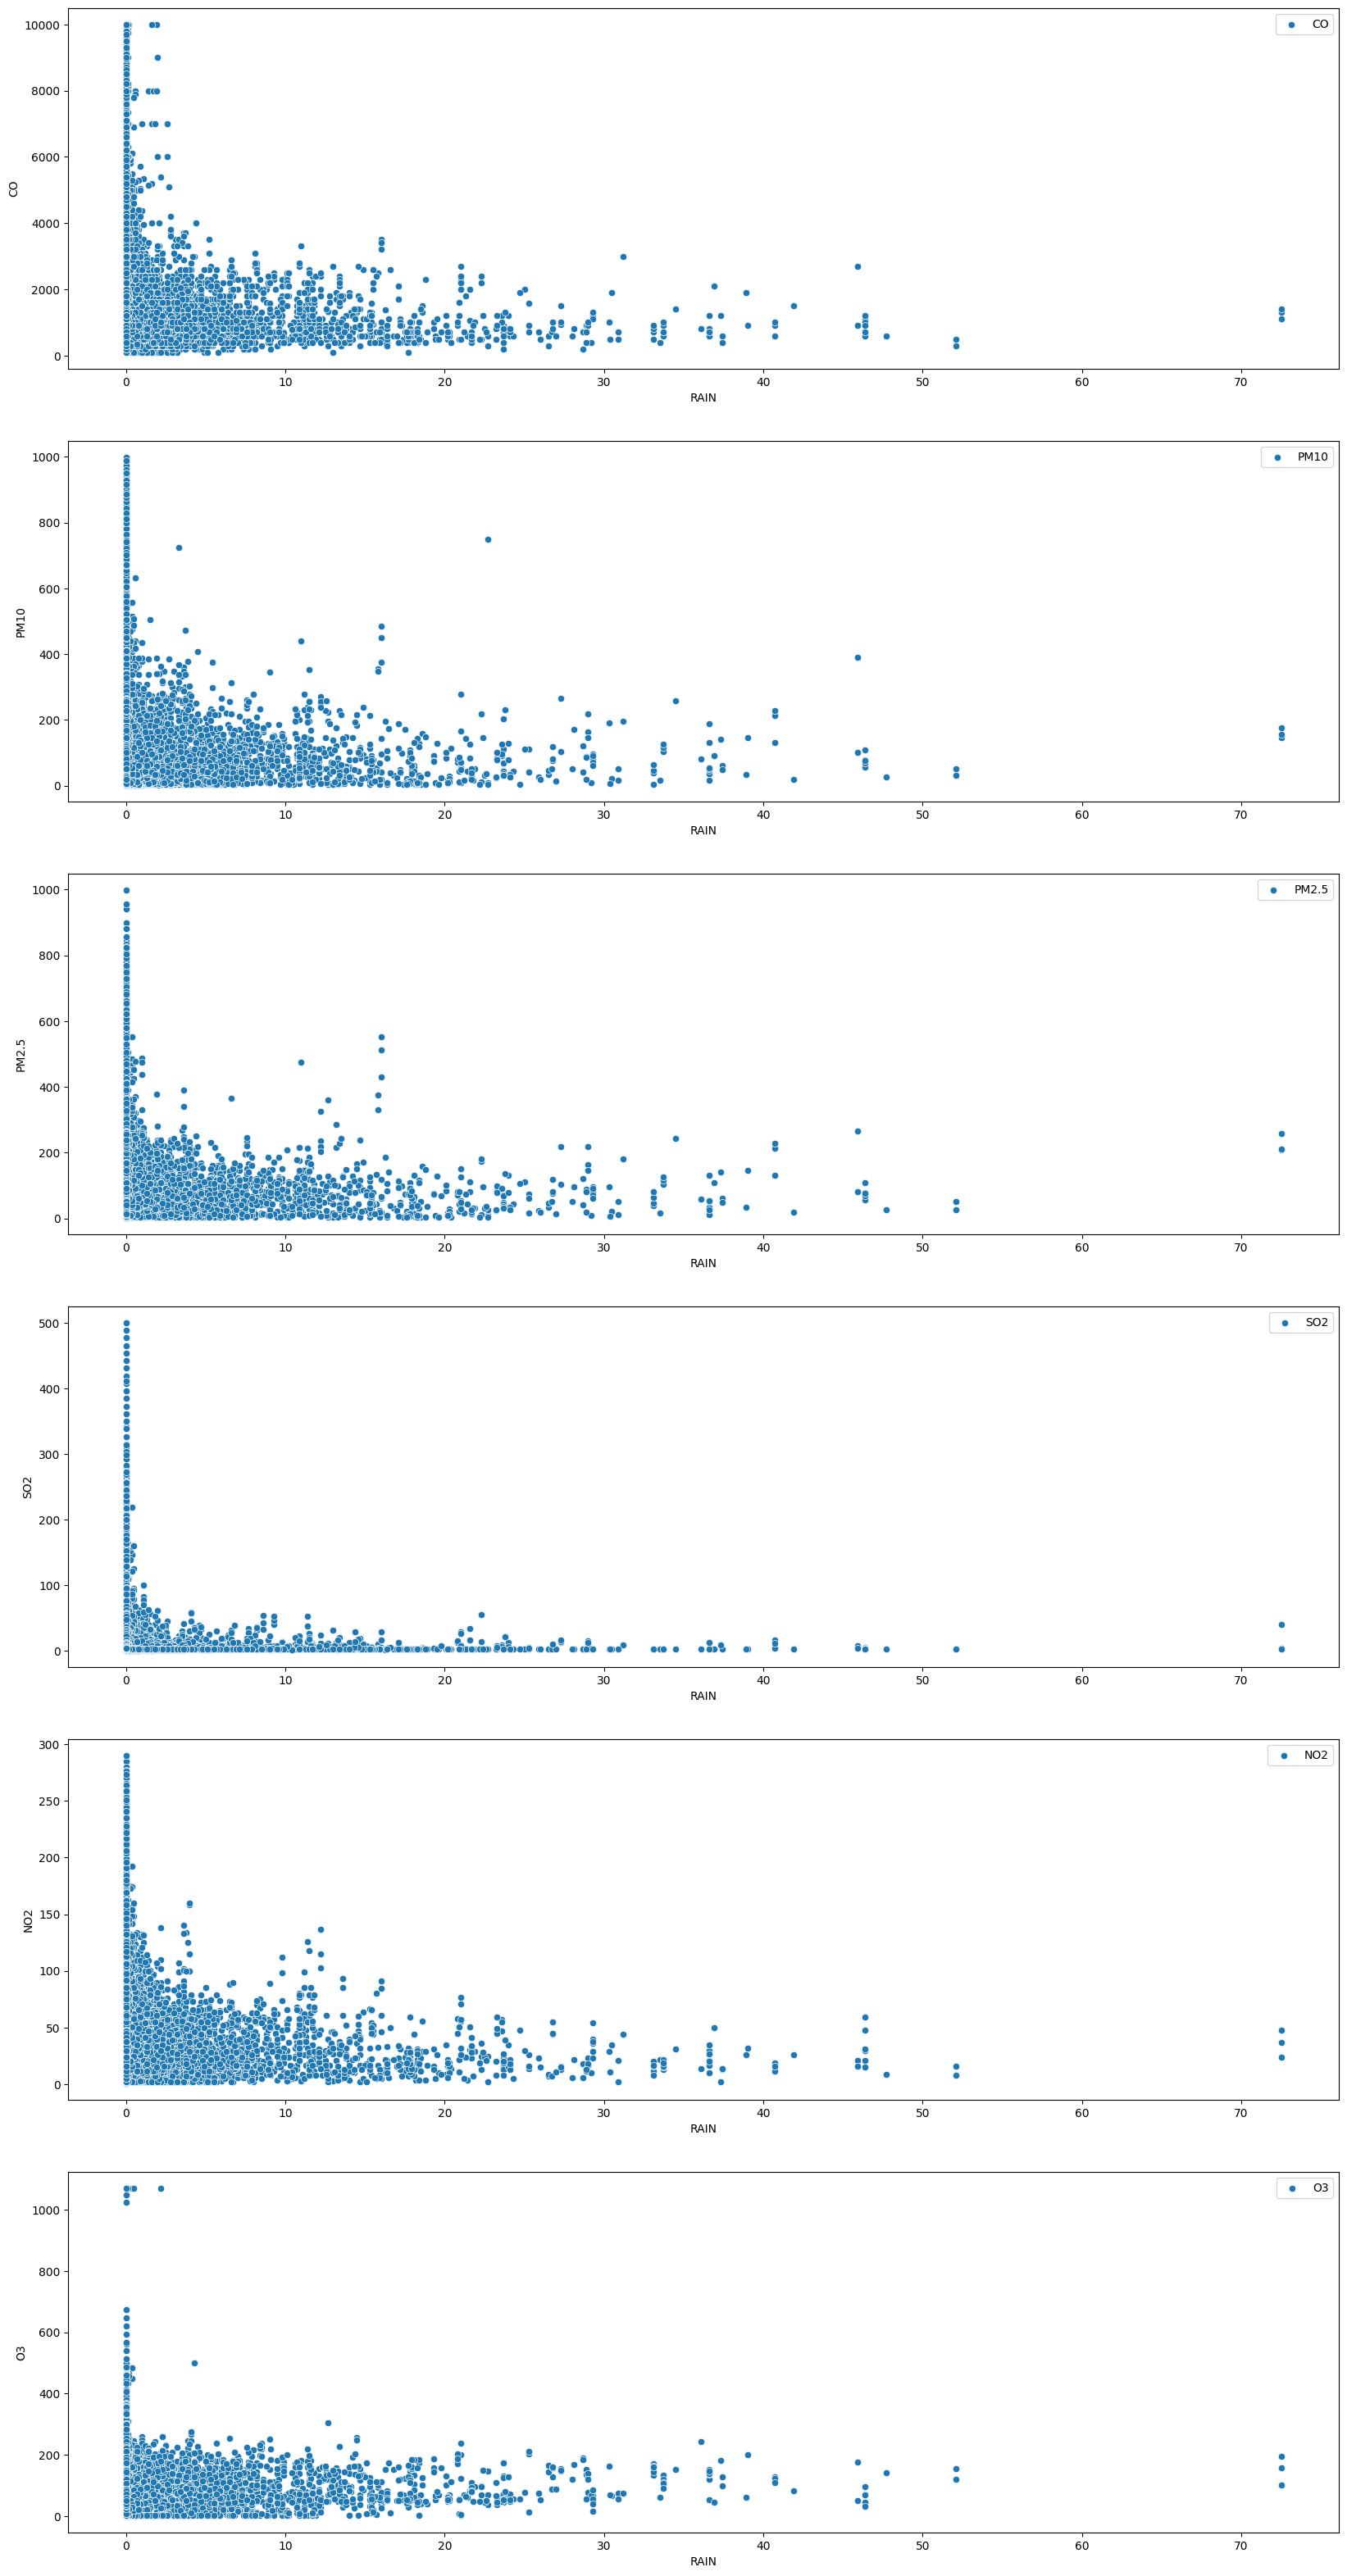

In [238]:
fig,axs = plt.subplots(6,1,figsize=(20,40))
sns.scatterplot(ax=axs[0],x='RAIN', y='CO', data = airquality_df,label='CO')
sns.scatterplot(ax=axs[1],x='RAIN', y='PM10', data = airquality_df,label='PM10')
sns.scatterplot(ax=axs[2],x='RAIN', y='PM2.5', data = airquality_df,label='PM2.5')
sns.scatterplot(ax=axs[3],x='RAIN', y='SO2', data = airquality_df,label='SO2')
sns.scatterplot(ax=axs[4],x='RAIN', y='NO2', data = airquality_df,label='NO2')
sns.scatterplot(ax=axs[5],x='RAIN', y='O3', data = airquality_df,label='O3')
plt.legend()
plt.show()

### Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa parameter cuaca lain ('TEMP', 'PRES', 'DEWP', 'WSPM') ?

In [239]:
# Korelasi Parameter Curah Hujan dengan Paramater Kadar Udara
weather_correlation = airquality_df[[ 'RAIN','TEMP', 'PRES', 'DEWP', 'WSPM']].corr()
weather_correlation

,RAIN,TEMP,PRES,DEWP,WSPM
RAIN,1.000000,0.037647,-0.060952,0.086259,0.020975
TEMP,0.037647,1.000000,-0.813312,0.820247,0.032601
PRES,-0.060952,-0.813312,1.000000,-0.750271,0.065400
DEWP,0.086259,0.820247,-0.750271,1.000000,-0.296771
WSPM,0.020975,0.032601,0.065400,-0.296771,1.000000


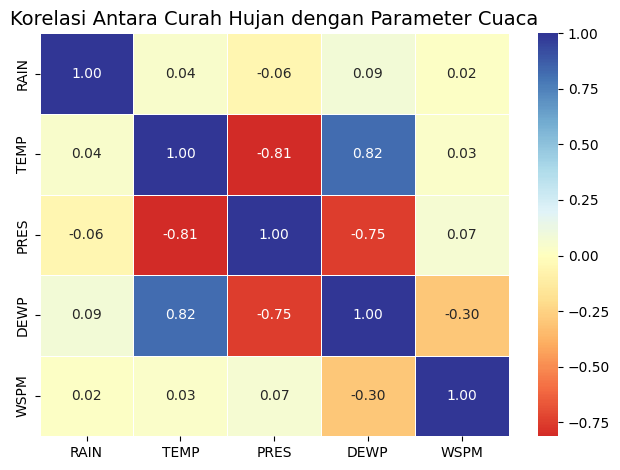

In [240]:
sns.heatmap(weather_correlation, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5, center=0)
plt.title('Korelasi Antara Curah Hujan dengan Parameter Cuaca', fontsize=14)
plt.tight_layout()
plt.show()

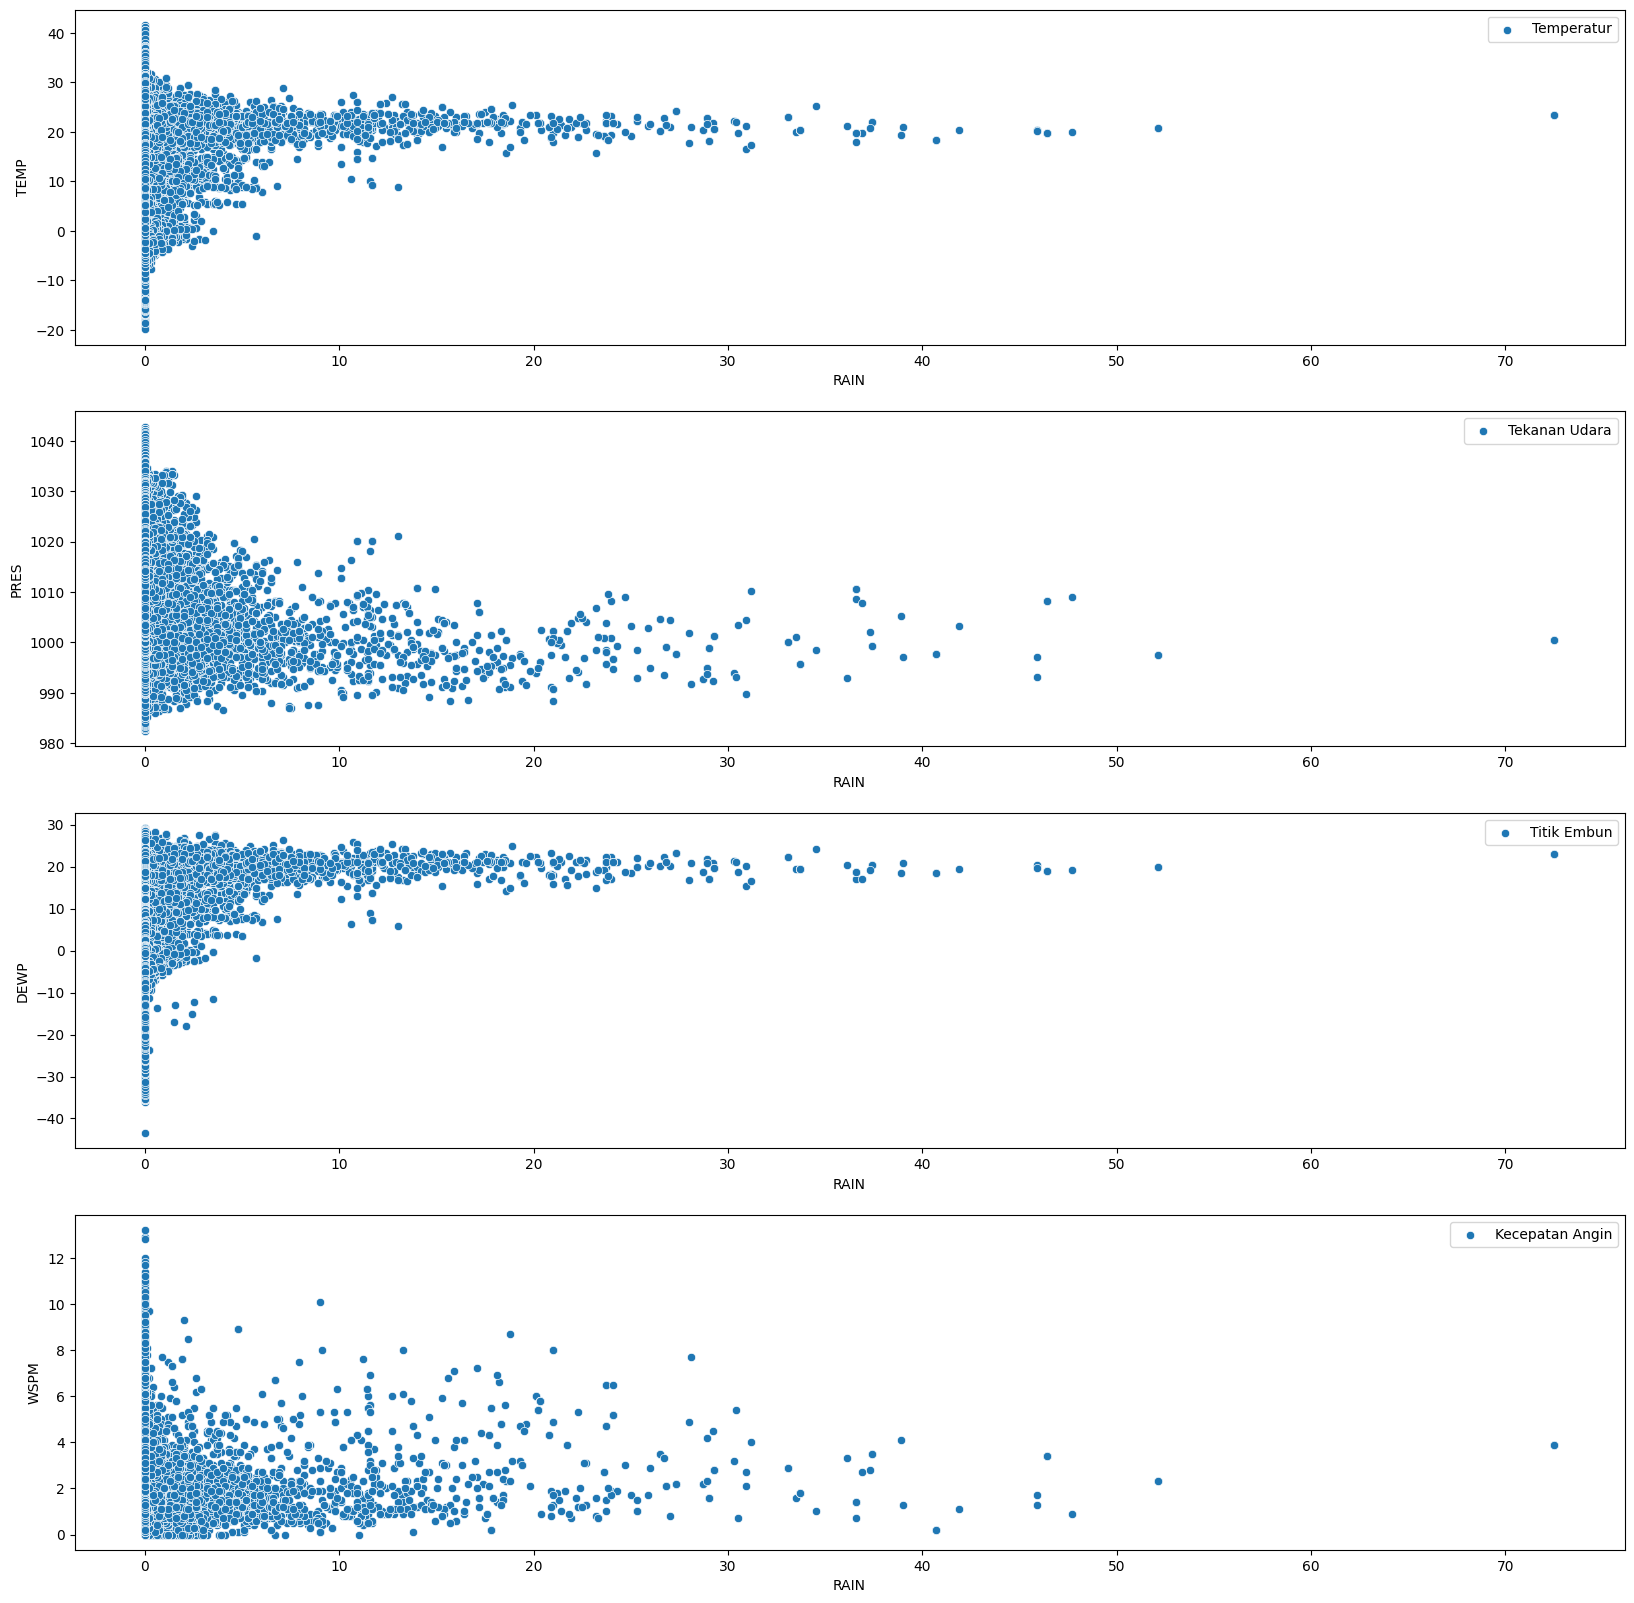

In [241]:
fig,axs = plt.subplots(4,1,figsize=(20,20))
sns.scatterplot(ax=axs[0],x='RAIN', y='TEMP', data = airquality_df,label='Temperatur')
sns.scatterplot(ax=axs[1],x='RAIN', y='PRES', data = airquality_df,label='Tekanan Udara')
sns.scatterplot(ax=axs[2],x='RAIN', y='DEWP', data = airquality_df,label='Titik Embun')
sns.scatterplot(ax=axs[3],x='RAIN', y='WSPM', data = airquality_df,label='Kecepatan Angin')
plt.legend()
plt.show()

### Apa ada hubungan antara masing-masing material polusi (PM2.5,PM10,SO2,NO2,CO,O3) dengan masing-masing faktor penentu cuaca (Temperature, Pressure, Dew Point, Rainfall, Wind Direction, Wind Speed) ?

In [242]:
# Korelasi Parameter Curah Hujan dengan Paramater Kadar Udara
airquality_correlation = airquality_df[[ 'RAIN', 'TEMP', 'PRES', 'DEWP', 'WSPM' ,'CO','PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].corr()
airquality_correlation

,RAIN,TEMP,PRES,DEWP,WSPM,CO,PM2.5,PM10,SO2,NO2,O3
RAIN,1.000000,0.037647,-0.060952,0.086259,0.020975,-0.013281,-0.014452,-0.026505,-0.040028,-0.043665,0.023361
TEMP,0.037647,1.000000,-0.813312,0.820247,0.032601,-0.324057,-0.131607,-0.096078,-0.320237,-0.277279,0.592248
PRES,-0.060952,-0.813312,1.000000,-0.750271,0.065400,0.188045,0.019862,-0.018375,0.221235,0.176652,-0.446725
DEWP,0.086259,0.820247,-0.750271,1.000000,-0.296771,-0.060315,0.113045,0.067674,-0.266121,-0.032569,0.312980
WSPM,0.020975,0.032601,0.065400,-0.296771,1.000000,-0.290413,-0.271425,-0.178200,-0.108536,-0.395699,0.294351
CO,-0.013281,-0.324057,0.188045,-0.060315,-0.290413,1.000000,0.780165,0.691887,0.522678,0.694036,-0.306979
PM2.5,-0.014452,-0.131607,0.019862,0.113045,-0.271425,0.780165,1.000000,0.878874,0.478223,0.664306,-0.149508
PM10,-0.026505,-0.096078,-0.018375,0.067674,-0.178200,0.691887,0.878874,1.000000,0.460572,0.645583,-0.110443
SO2,-0.040028,-0.320237,0.221235,-0.266121,-0.108536,0.522678,0.478223,0.460572,1.000000,0.495826,-0.165311
NO2,-0.043665,-0.277279,0.176652,-0.032569,-0.395699,0.694036,0.664306,0.645583,0.495826,1.000000,-0.465912


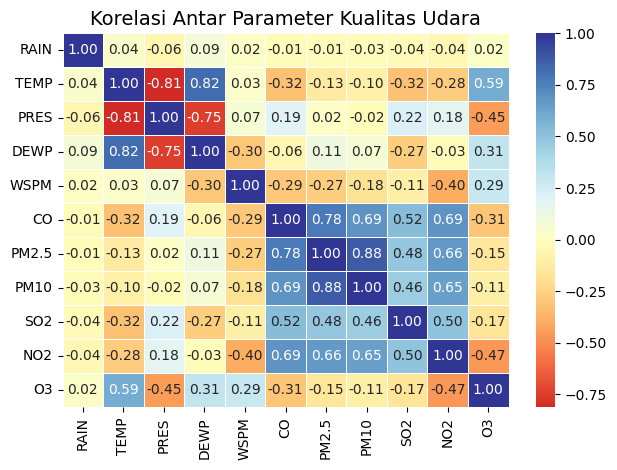

In [243]:
sns.heatmap(airquality_correlation, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5, center=0)

plt.title('Korelasi Antar Parameter Kualitas Udara', fontsize=14)
plt.tight_layout()
plt.show()

**Insight:**
- Mengetahui stasiun yang memiliki curah hujan tertinggi dan terendah.
- Mengetahui stasiun yang memiliki kualitas udara terbaik dan terburuk.
- Tren cuaca pada dataset ini menunjukkan bahwa cuaca melalui curah hujan memiliki siklus yang dapat diperkirakan.
- Terdapat hubungan atau korelasi yang mempengaruhi curah hujan bila dibandingkan dengan parameter kadar udara yang cukup signifikan.
- Terdapat hubungan atau korelasi yang mempengaruhi parameter cuaca dengan parameter kadar udara tidak semuanya tapi bisa dianalisa.

## Metode Clustering

Untuk mengetahui hubungan curah hujan dengan masing-masing parameter cuaca seperti TEMP, DEWP dan WSPM maka diperluka metode clustering sehingga niai nilai tertentu dapat dilihat pola pengelompokannya.

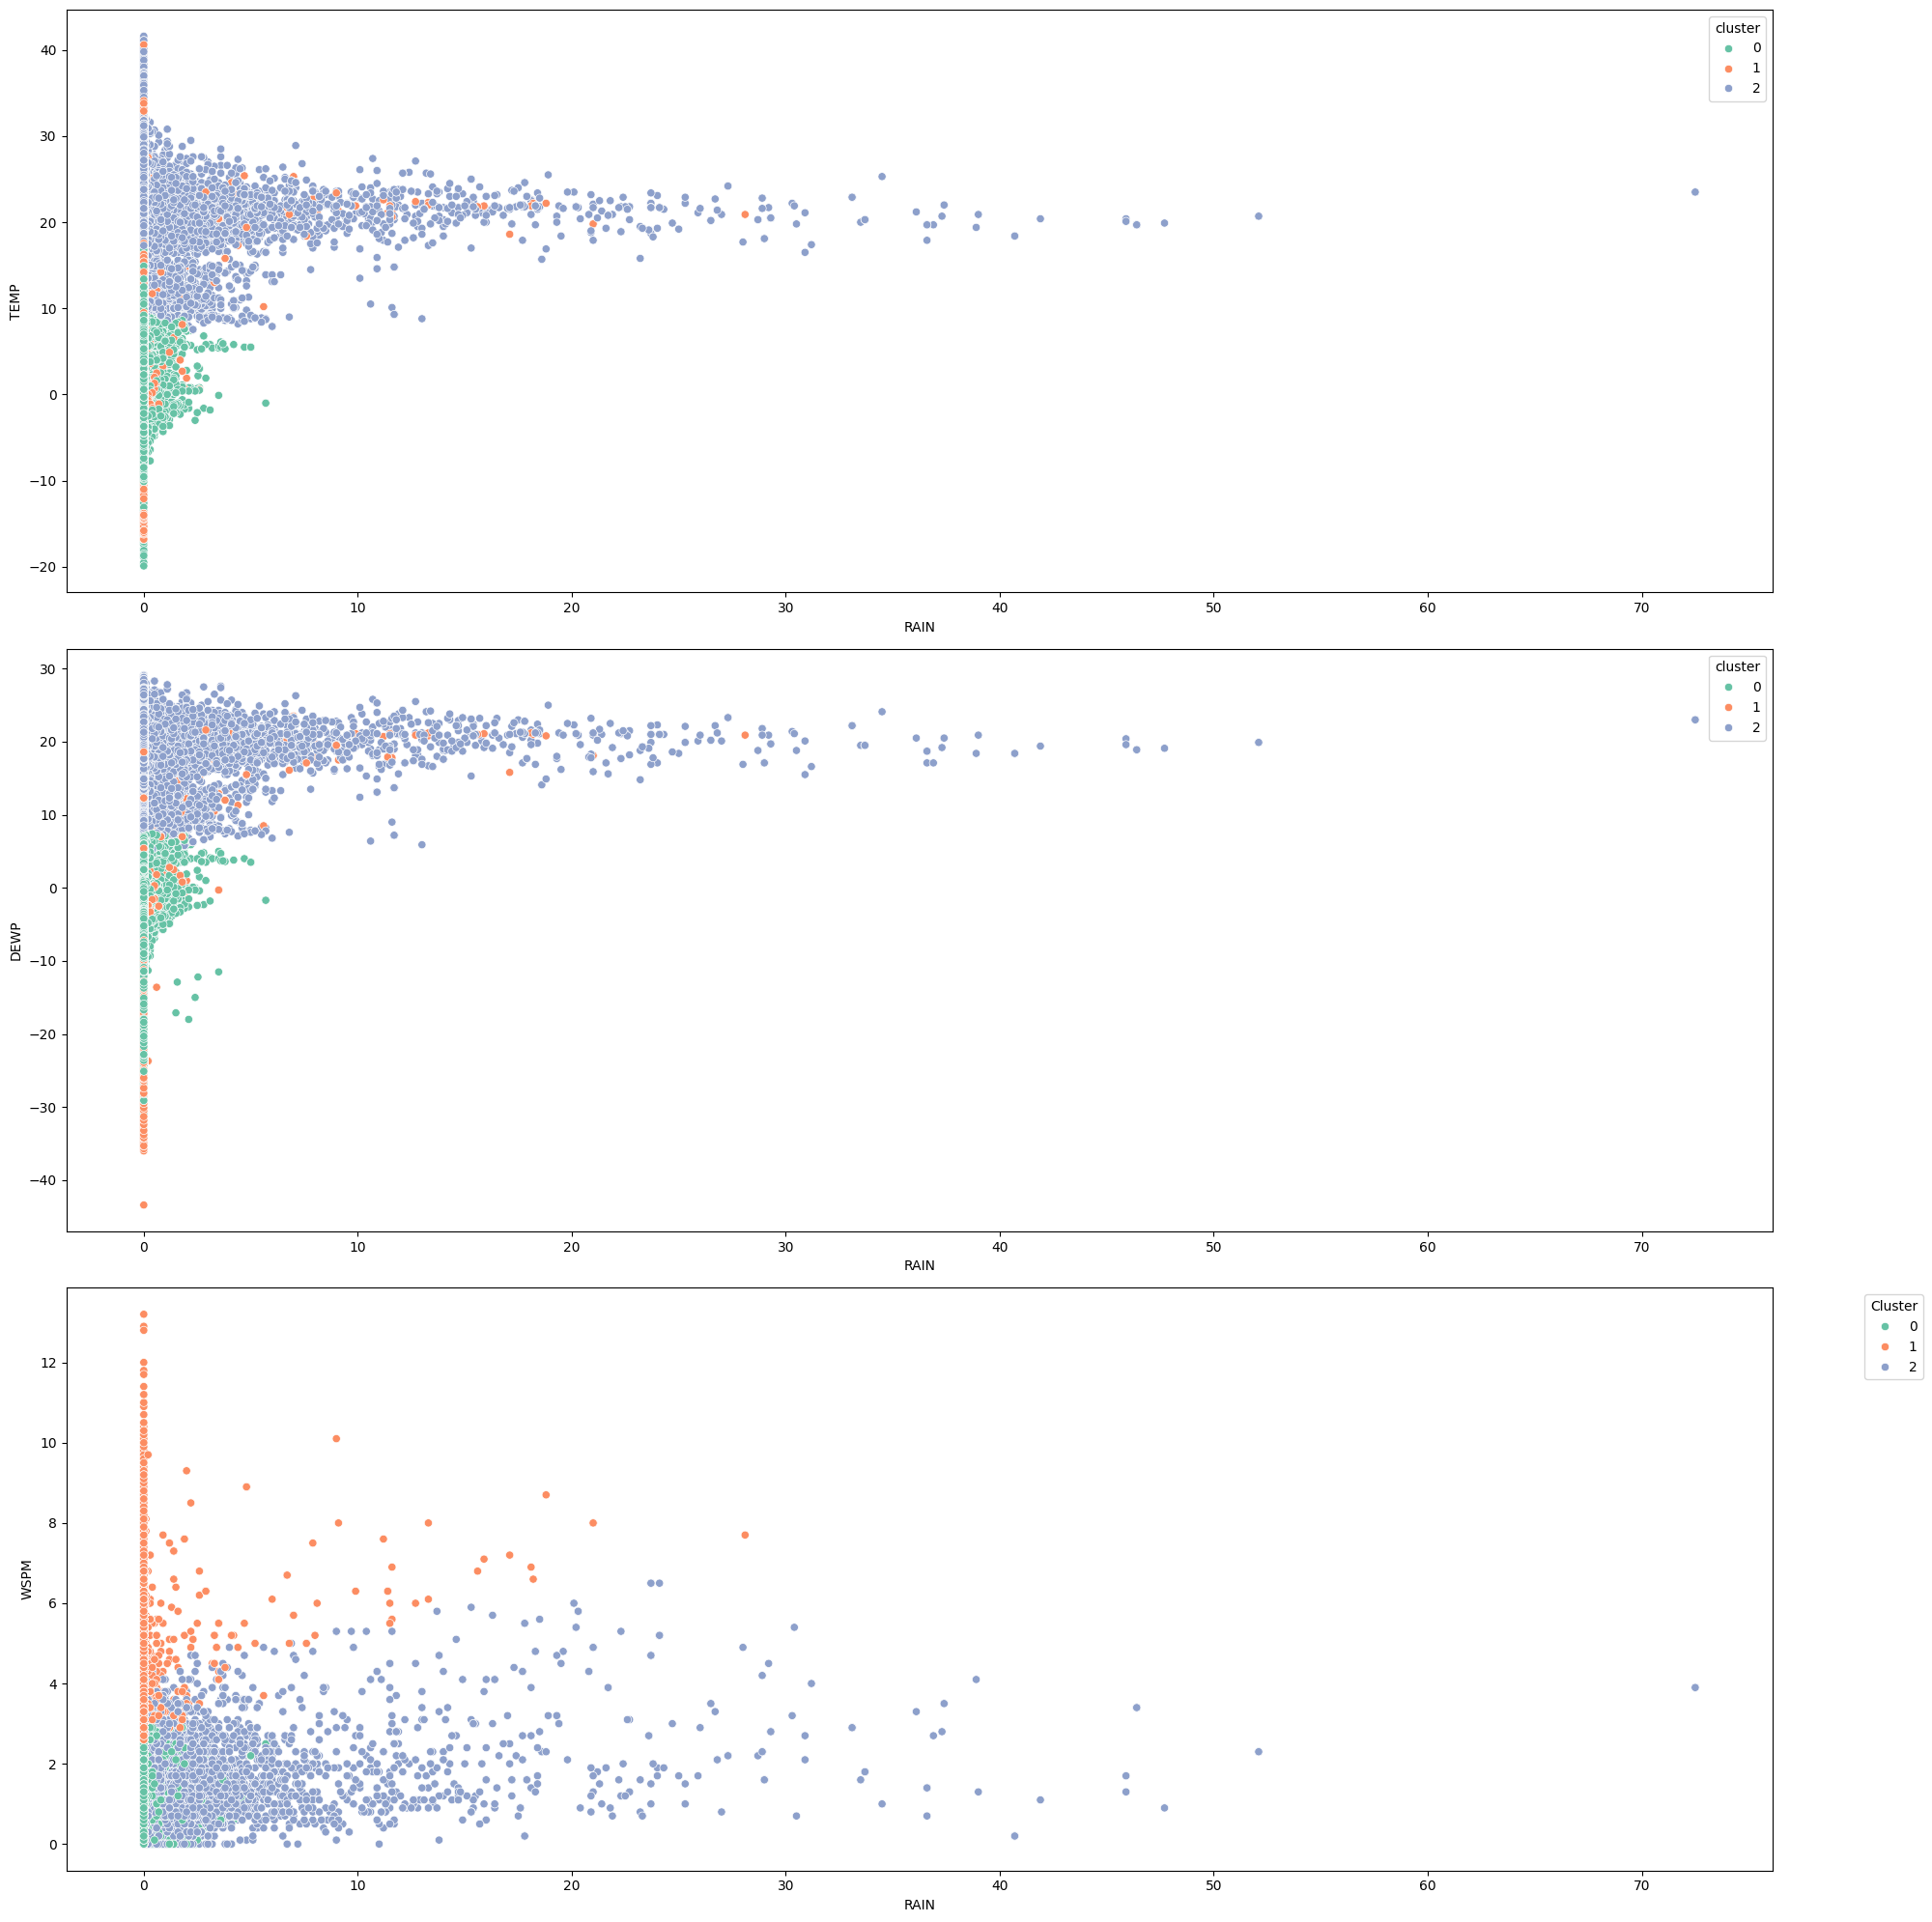

In [244]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang ingin digunakan untuk clustering
features = ['RAIN', 'TEMP', 'DEWP', 'WSPM']

# Ambil subset data yang diperlukan
data = airquality_df[features].fillna(0)  # Pastikan tidak ada nilai NaN

# Standarisasi data (penting untuk K-means agar skala fitur tidak mempengaruhi hasil)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tentukan jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Menambahkan hasil prediksi cluster ke data asli
airquality_df['cluster'] = kmeans.labels_

# Plotting scatter plot untuk setiap pasangan variabel dengan cluster yang berbeda
fig, axs = plt.subplots(3, 1, figsize=(20, 20))

# Scatter plot untuk masing-masing pair dengan warna berdasarkan cluster
sns.scatterplot(ax=axs[0], x='RAIN', y='TEMP', data=airquality_df, hue='cluster', palette='Set2', legend='full')
# sns.scatterplot(ax=axs[1], x='RAIN', y='PRES', data=airquality_df, hue='cluster', palette='Set2', legend='full')
sns.scatterplot(ax=axs[1], x='RAIN', y='DEWP', data=airquality_df, hue='cluster', palette='Set2', legend='full')
sns.scatterplot(ax=axs[2], x='RAIN', y='WSPM', data=airquality_df, hue='cluster', palette='Set2', legend='full')

# Menambahkan judul dan label
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Dilihat dari pengelompokan diatas tampak bahwa data dengan cluster berwarna biru merupakan pengelompokan yang memmiliki data kumpulan banyak dengan nilai sebanding, sedangkan warna cluster warna hijau menengah dan warna merah palig sedikit. Ini berarti bahwa data curah hujan terhadap parameter cuaca lain seperti TEMP, DEWP dan WSPM memiliki kaitan erat pada batas tertentu.

## Conclusion

Kesimpulan di dapatkan melalui pertanyaan yang sudah dirumuskan di awal.
1. Wilayah stasiun mana saja yang memiliki curah hujan tertinggi dan terrendah bila diurutkan berdasarkan top three?

  - Jika diurutkan berdasarkan curah hujan tertinggi maka stasiun wilayah top three yaitu Wanliu, Huairou dan Aotizhongxin. Sedangkan untuk curah hujan terendah ada pada stasiun wilayah yaitu Dingling, Changping dan Shunyi.

2. Wilayah stasiun mana saja yang memiliki kualitas udara terbaik dan terburuk bila diurutkan berdasarkan top three?

  - Stasiun dengan kualitas udara dilihat dari kadar material udaranya yang terbaik top three yaitu Dingling, Huairou dan Shunyi. Sedangkan kualitas udara dengan kadar material terburuk ada di wilayah stasiun Wanliu, Dongsi dan Nongzhanguan.

3. Apakah dalam kurun waktu tertentu (bulan) memiliki keterkaitan untuk dapat memperkirakan cuaca?

  - Melalui gambaran grafik curah hujan dari tahun 2013 hingga 2017 untuk semua stasiun wilayah memiliki grafik time-series line chart yang cukup bagus dan terdapat pola yang terbaca. Sehingga jika dikembangkan lagi ke dalam metode machine learning maka bisa memperkirakan cuaca dalam beberapa waktu kedepan.

4. Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa material polusi (PM2.5,PM10,SO2,NO2,CO,O3) ?

  - Curah hujan sangat berpengaruh hampir ke semua parameter kadar material udara, jika melihat dari heatmap korelasi bisa dilihat untuk PM2.5,PM10,SO2,NO2,CO bernilai negatif sehingga disimpulkan bahwa datanya berbedanding terbalik dengan curah hujan. Semakin tinggi curah hujan maka semakin kecil partikel kada udara kelima tersebut. Sedangkan O3 atau Ozon ini berbanding lurus.

5. Apakah ada hubungan antara curah hujan di suatu wilayan station tertentu dengan beberapa parameter cuaca lain ('TEMP', 'PRES', 'DEWP', 'WSPM') ?

  - Selain dari parameter kada udara curah hujan dipengaruhi oleh beberapa faktor cuaca diantaranya tekanan udara (PRES), temperature (TEMP), titik embun (DEWP) dan juga kecepatan angin (WSPM). Hanya tekanan udara saja yang memiliki nilai negatif berbanding terbalik korelasinya dengan curah hujan. Nilai nya tidak semua hampir mendekati 1 namun memiliki korelasi yang cukup memiliki pengaruh.

6. Apa ada hubungan antara masing-masing material polusi (PM2.5,PM10,SO2,NO2,CO,O3) dengan masing-masing faktor penentu cuaca (Temperature, Pressure, Dew Point, Rainfall, Wind Direction, Wind Speed) ?

  - Masing-masing parameter cuaca apabila dibandingkan dengan material polusi atau kadar udara memang tidak spesifik namun dari grafik heatmap nilainya cukup berbeda-beda namun fokus utamanya dinilai pada curah hujan. Kesimpulannya hampir sama dengan yang sudah diuji dari curah hujan terhadap parameter lain.

Secara umum melalui analisis yang sudah dibuat fokus utamanya adalah curah hujan pada suatu stasiun wilayah tertentu. Kemudian diujikan dengan beberapa parameter lain termasuk tanggal, jika dilihat kesimpulannya semua parameter lain dibandingkan dengan curah hujan memiliki pengaruh namun nilainya tidak begitu spesifik. Karena secara waktu cuaca ternyata memiliki siklus dan baik itu parameter cuaca atau parameter kadar udara material polusi memiliki dampak yang tidak signifikan terhadap perubahan cuaca. Seperti diwilayah tertentu ketika menentukan curah hujan tertinggi dan kadar polusi paling sedikit tidak menarik satu stasiun wilayah yang sama. Ada kemungkinan curah hujan tidak terdeteksi dengan baik terhadap parameter lain karena ditemukan nilai null atau NaN yang cukup banyak di beberapa kolom. Walaupun dengan metode interpolate tapi hasilnya masih belum bisa dikatakan paling cocok.